In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, TweedieRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns

original_data = pd.read_csv('Diamonds_train.csv', 
                            index_col='Unnamed: 0')

In [17]:
original_data.sample(7)

,carat,cut,color,clarity,depth,table,price,x,y,z
42425,0.51,Good,F,SI1,63.6,56.0,1312,5.11,5.08,3.24
29815,0.30,Premium,D,SI1,62.4,60.0,709,4.26,4.23,2.65
1362,1.00,Fair,G,SI1,65.7,54.0,2964,6.24,6.16,4.07
39939,0.23,Very Good,E,VVS1,62.0,58.0,492,3.92,3.95,2.44
15397,1.12,Ideal,E,SI2,61.6,56.0,6168,6.69,6.71,4.13
6475,0.88,Ideal,F,SI1,62.3,53.0,4054,6.12,6.15,3.82
22943,1.04,Premium,D,VVS2,61.1,60.0,10984,6.54,6.51,3.99


In [18]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43152 entries, 1 to 43152
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43081 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.6+ MB


In [19]:
original_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

/Users/vladimiragishev/mambaforge/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

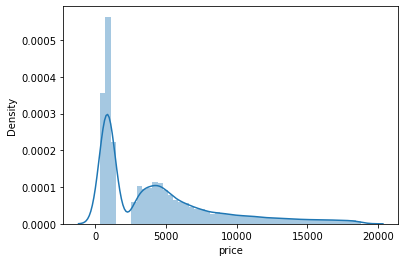

In [20]:
sns.distplot(original_data['price']) # tweedie distribution

In [21]:
original_data.groupby('color').mean()['depth']

color
D    61.705975
E    61.676968
F    61.724917
G    61.749030
H    61.834516
I    61.817808
J    61.904112
Name: depth, dtype: float64

In [22]:
original_data.groupby('cut').mean()['depth'] 
# вот здесь различается по категориям, можно попробовать так заполнить

cut
Fair         64.113022
Good         62.433128
Ideal        61.718572
Premium      61.273436
Very Good    61.829922
Name: depth, dtype: float64

In [23]:
original_data.groupby('clarity').mean()['depth']

clarity
I1      62.774614
IF      61.534917
SI1     61.872674
SI2     61.765281
VS1     61.677227
VS2     61.726549
VVS1    61.622322
VVS2    61.671577
Name: depth, dtype: float64

In [24]:
Y = original_data.price

In [25]:
X = original_data.drop('price', axis=1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [27]:
x_train.isna().sum()[:10]

carat       0
cut         0
color       0
clarity     0
depth      47
table       0
x           0
y           0
z           0
dtype: int64

In [28]:
x_train['depth'] = x_train.groupby('cut')['depth'].apply(lambda x:x.fillna(x.mean()))
x_test['depth'] = x_test.groupby('cut')['depth'].apply(lambda x:x.fillna(x.mean()))

# Методы замены пропущенных значений

In [29]:
from sklearn.impute import SimpleImputer
SimpleImputer(missing_values=np.nan, strategy='mean')

SimpleImputer()

In [30]:
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
IterativeImputer(random_state=0)
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
print(np.round(imp.transform(X_test)))

ImportError: cannot import name 'IterativeImputer' from 'sklearn.impute' (/Users/vladimiragishev/mambaforge/lib/python3.9/site-packages/sklearn/impute/__init__.py)

In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")

In [32]:
x_train = pd.get_dummies(data=x_train, drop_first=True)
x_test = pd.get_dummies(data=x_test, drop_first=True)

In [33]:
x_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

In [34]:
x_train.isna().sum()[:10]

carat            0
depth            0
table            0
x                0
y                0
z                0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
dtype: int64

In [35]:
scaler = StandardScaler()

scaled_train_data = pd.DataFrame(
    scaler.fit_transform(x_train),
    columns = x_train.columns)

scaled_test_data = pd.DataFrame(
    scaler.transform(x_test),
    columns = x_test.columns)

# Normalization
<img src="minmax.png" alt="Alternative text" />

# Standartization
<img src="stand.png" alt="Alternative text" />

In [36]:
scaled_train_data

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.858567,-1.014673,0.671737,-0.880419,-0.837340,-0.956540,-0.313942,-0.800796,1.653125,-0.534090,...,-0.440945,-0.338119,-0.242221,-0.191171,1.789655,-0.475596,-0.419217,-0.529429,-0.273834,-0.316164
1,0.492155,0.033512,0.224991,0.639669,0.646475,0.659082,-0.313942,-0.800796,-0.604915,1.872343,...,-0.440945,-0.338119,4.128463,-0.191171,-0.558767,2.102625,-0.419217,-0.529429,-0.273834,-0.316164
2,1.294758,-0.385762,0.224991,1.267532,1.283548,1.233229,-0.313942,1.248758,-0.604915,-0.534090,...,2.267857,-0.338119,-0.242221,-0.191171,-0.558767,-0.475596,2.385402,-0.529429,-0.273834,-0.316164
3,-0.623659,0.452786,-0.668501,-0.541704,-0.522835,-0.489211,-0.313942,1.248758,-0.604915,-0.534090,...,2.267857,-0.338119,-0.242221,-0.191171,-0.558767,-0.475596,-0.419217,1.888828,-0.273834,-0.316164
4,0.100641,-0.106246,1.565230,0.243124,0.267457,0.245163,3.185298,-0.800796,-0.604915,-0.534090,...,-0.440945,-0.338119,-0.242221,-0.191171,-0.558767,2.102625,-0.419217,-0.529429,-0.273834,-0.316164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30201,-0.878143,0.732302,-0.221755,-0.946510,-0.893789,-0.863074,-0.313942,-0.800796,-0.604915,1.872343,...,-0.440945,-0.338119,-0.242221,-0.191171,-0.558767,-0.475596,-0.419217,1.888828,-0.273834,-0.316164
30202,-0.917294,-1.783343,1.118483,-0.872158,-0.885725,-1.050005,-0.313942,-0.800796,1.653125,-0.534090,...,-0.440945,-0.338119,-0.242221,-0.191171,-0.558767,-0.475596,-0.419217,1.888828,-0.273834,-0.316164
30203,0.120217,-1.294189,0.224991,0.433135,0.356164,0.245163,-0.313942,-0.800796,-0.604915,1.872343,...,-0.440945,2.957535,-0.242221,-0.191171,-0.558767,-0.475596,-0.419217,1.888828,-0.273834,-0.316164
30204,-0.290872,-0.455641,-0.221755,-0.079068,-0.063175,-0.115348,-0.313942,1.248758,-0.604915,-0.534090,...,-0.440945,-0.338119,-0.242221,-0.191171,-0.558767,-0.475596,2.385402,-0.529429,-0.273834,-0.316164


In [37]:
LR_model = LinearRegression().fit(scaled_train_data, y_train)

LR_y_pred = LR_model.predict(scaled_test_data)

LR_model.coef_

array([ 5.67410277e+03, -9.67760225e+01, -6.44143282e+01, -1.13540375e+03,
       -2.74520485e+00,  1.75665025e+01,  1.97671221e+02,  4.89849765e+02,
        3.95874028e+02,  3.63853886e+02, -8.92031738e+01, -1.12416917e+02,
       -2.15324361e+02, -4.09398948e+02, -4.89280986e+02, -6.03890358e+02,
        1.05698390e+03,  1.69381347e+03,  1.13425678e+03,  1.78249382e+03,
        1.93777350e+03,  1.37929269e+03,  1.55474407e+03])

In [1721]:
LR_results_df = pd.DataFrame({'Actual': y_test, 'Predicted': LR_y_pred})

# предсказанная отрицательная цена - это не то же самое, 
# что и положительное значение, поэтому без abs
# на самом деле это знак, что данная модель не (совсем) подходит этим данным
# то есть плохо предсказывает дешевые алмазы

LR_results_df.head(20)

,Actual,Predicted
7658,4269,4097.768406
9767,4662,4907.646409
24138,12308,10692.419574
22881,10922,9239.092658
33267,826,1461.722996
36657,949,1440.529065
1661,3024,4134.803971
5487,3841,4451.394905
21691,626,178.047237
2485,3195,4554.307797


In [1722]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, LR_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, LR_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, LR_y_pred)))

Mean Absolute Error: 816.9338964080973
Mean Squared Error: 1429410.5996915086
Root Mean Squared Error: 1195.579608261829


In [1723]:
# это расширение линейной регрессии для работы с "ненормально" распределенными данными
TR = TweedieRegressor(power=1.0,
                      max_iter=500,
                      alpha=0.5,
                      link='log').fit(scaled_train_data, y_train)

TR_y_pred = TR.predict(scaled_test_data)

# Распределение tweedie
<img src="tweedie-distribution.png" alt="Alternative text" />

In [1724]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': TR_y_pred})

results_df.head(20)

,Actual,Predicted
7658,4269,3567.830068
9767,4662,4648.464895
24138,12308,11139.299079
22881,10922,11266.156778
33267,826,930.889066
36657,949,861.690492
1661,3024,3754.823192
5487,3841,3477.216012
21691,626,712.470989
2485,3195,3817.674233


In [1725]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, TR_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, TR_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, TR_y_pred)))

Mean Absolute Error: 505.0904633732999
Mean Squared Error: 892089.5341280167
Root Mean Squared Error: 944.5049148247015
